## Table for demographic features

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 文件路径
file_path = 'Data\Data_SurveyPlusDemographics.txt'

# 读取文件
data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# 显示数据的前几行
print(data.head())

   File  Row   Q1   Q2   Q3  Q4  FQ1  FQ2  FQ3  ComQ1  ...   D6  Dmed_7  \
0     1    1  5.0  5.0  4.0   5  3.0  1.0    3    1.0  ...  1.0    30.0   
1     1    2  4.0  4.0  4.0   4  3.0  1.0    3    2.0  ...  1.0    29.0   
2     1    3  5.0  5.0  4.0   4  3.0  1.0    3    1.0  ...  1.0    32.0   
3     1    4  5.0  5.0  4.0   4  3.0  4.0    3    1.0  ...  1.0    31.0   
4     1    5  5.0  5.0  5.0   5  3.0  1.0    3    1.0  ...  1.0    34.0   

   Dmed_8 DMed_1  DMed_2  DMed_3  DMed_9  Dmed_10  Dmed_5  Dmed_6  
0     152    4.0     1.0     4.0     3.0      5.0     1.0     1.0  
1     150    3.0     1.0     8.0     3.0      6.0     1.0     1.0  
2     160    1.0     1.0     4.0     6.0      5.0     1.0     1.0  
3     168    5.0     1.0    12.0     2.0      5.0     1.0     3.0  
4     220    5.0     1.0    12.0     3.0      4.0     7.0    15.0  

[5 rows x 123 columns]


C:\Users\howar\AppData\Local\Temp\ipykernel_17400\4158831368.py:10: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')


In [18]:
demographic_data = data[data.columns[-15:]]

In [19]:
import pandas as pd
import re


# 定义一个函数来清理数值数据
def clean_numeric(value):
    if isinstance(value, str):
        # 使用正则表达式提取数值部分
        numeric_value = re.findall(r'\d+', value)
        if numeric_value:
            return float(numeric_value[0])
        else:
            return None
    return value

# 清理数据，将所有列转换为数值类型
for column in demographic_data.columns:
    demographic_data[column] = demographic_data[column].apply(clean_numeric)

# 将数据转换为浮点型
demographic_data = demographic_data.astype(float)

# 获取第一行数据
first_row = demographic_data.iloc[0]

# 按列名、数据类型和内容分别打印
for column_name in demographic_data.columns:
    value = first_row[column_name]
    dtype = demographic_data[column_name].dtype
    print(f"{column_name} (Type: {dtype}): {value}")

# 检查清理后的数据
print(demographic_data.head())


D1 (Type: float64): 21.0
D2 (Type: float64): 2.0
D3 (Type: float64): 1.0
D4 (Type: float64): 6.0
D5 (Type: float64): 1.0
D6 (Type: float64): 1.0
Dmed_7 (Type: float64): 30.0
Dmed_8 (Type: float64): 152.0
DMed_1 (Type: float64): 4.0
DMed_2 (Type: float64): 1.0
DMed_3 (Type: float64): 4.0
DMed_9 (Type: float64): 3.0
Dmed_10 (Type: float64): 5.0
Dmed_5 (Type: float64): 1.0
Dmed_6 (Type: float64): 1.0
     D1   D2   D3   D4   D5   D6  Dmed_7  Dmed_8  DMed_1  DMed_2  DMed_3  \
0  21.0  2.0  1.0  6.0  1.0  1.0    30.0   152.0     4.0     1.0     4.0   
1  22.0  2.0  1.0  4.0  3.0  1.0    29.0   150.0     3.0     1.0     8.0   
2  33.0  2.0  1.0  6.0  6.0  1.0    32.0   160.0     1.0     1.0     4.0   
3  17.0  2.0  1.0  5.0  6.0  1.0    31.0   168.0     5.0     1.0    12.0   
4  17.0  1.0  1.0  4.0  1.0  1.0    34.0   220.0     5.0     1.0    12.0   

   DMed_9  Dmed_10  Dmed_5  Dmed_6  
0     3.0      5.0     1.0     1.0  
1     3.0      6.0     1.0     1.0  
2     6.0      5.0     1.0     

C:\Users\howar\AppData\Local\Temp\ipykernel_17400\3810201732.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data[column] = demographic_data[column].apply(clean_numeric)


## Categorize into subgroups

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 数据预处理
# 将分类数据转换为数值
demographic_data = demographic_data.apply(pd.to_numeric, errors='coerce')
demographic_data = demographic_data.fillna(0)  # 填充缺失值

# 标准化数据
scaler = StandardScaler()
demographic_data_scaled = scaler.fit_transform(demographic_data)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=32, random_state=42)
kmeans.fit(demographic_data_scaled)

# 添加聚类标签到原始数据
data['Cluster'] = kmeans.labels_

# 评估聚类效果
silhouette_avg = silhouette_score(demographic_data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# 显示聚类结果的前几行
print(data.head())


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K = range(2, 50)  # 试验不同的K值
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(demographic_data_scaled)
    score = silhouette_score(demographic_data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 绘制Silhouette Score随K值变化的图
plt.plot(K, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# 尝试不同的簇数
silhouette_scores = []
K = range(2, 50)  # 试验不同的簇数
for k in K:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(demographic_data_scaled)
    score = silhouette_score(demographic_data_scaled, labels)
    silhouette_scores.append(score)

# 绘制Silhouette Score随簇数变化的图
plt.plot(K, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# 找到最优簇数
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_k}")
print(f"Best Silhouette Score: {max(silhouette_scores)}")

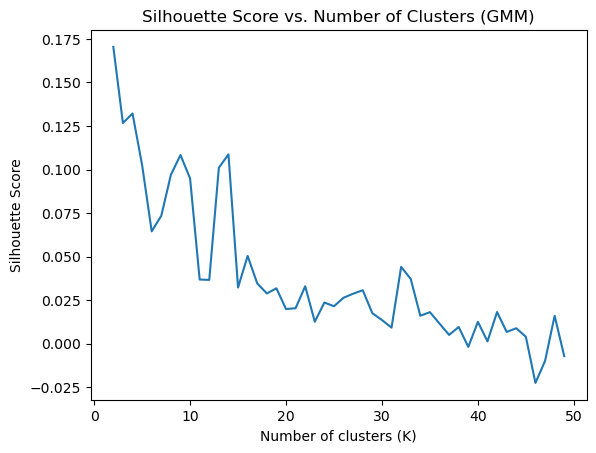

Optimal number of clusters: 2
Best Silhouette Score: 0.17039423255796


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# 尝试不同的簇数
silhouette_scores = []
K = range(2, 50)  # 试验不同的K值
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(demographic_data_scaled)
    labels = gmm.predict(demographic_data_scaled)
    score = silhouette_score(demographic_data_scaled, labels)
    silhouette_scores.append(score)

# 绘制Silhouette Score随K值变化的图
plt.plot(K, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (GMM)')
plt.show()

# 找到最优簇数
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_k}")
print(f"Best Silhouette Score: {max(silhouette_scores)}")


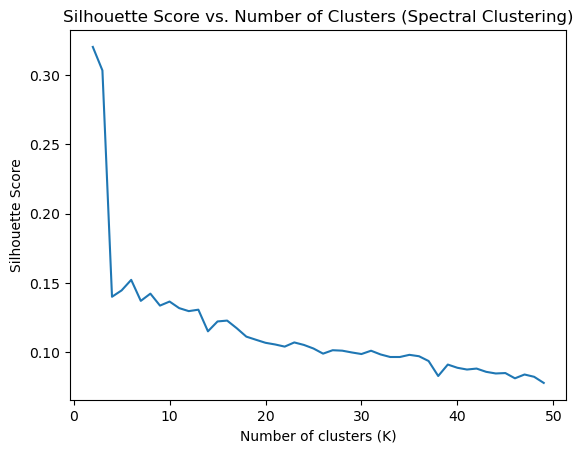

Optimal number of clusters: 2
Best Silhouette Score: 0.3203275541884252


In [ ]:
from sklearn.cluster import SpectralClustering

# 尝试不同的簇数
silhouette_scores = []
K = range(2, 50)  # 试验不同的K值
for k in K:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(demographic_data_scaled)
    score = silhouette_score(demographic_data_scaled, labels)
    silhouette_scores.append(score)

# 绘制Silhouette Score随K值变化的图
plt.plot(K, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Spectral Clustering)')
plt.show()

# 找到最优簇数
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_k}")
print(f"Best Silhouette Score: {max(silhouette_scores)}")


Silhouette Score (HDBSCAN): 0.2908705558359704


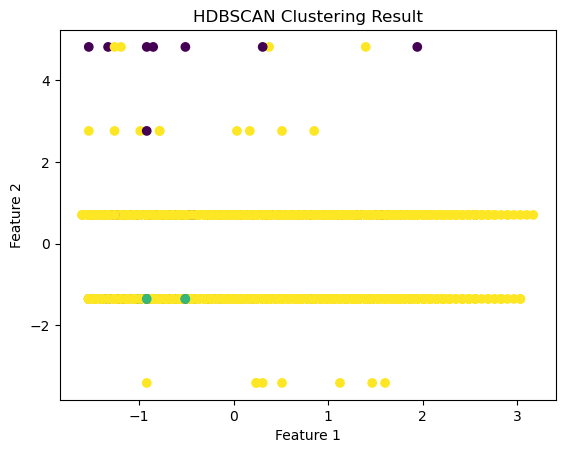

In [ ]:
import hdbscan

# HDBSCAN 不需要指定簇数
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels = clusterer.fit_predict(demographic_data_scaled)

# 计算Silhouette Score
score = silhouette_score(demographic_data_scaled, labels)
print(f"Silhouette Score (HDBSCAN): {score}")

# 绘制聚类结果
plt.scatter(demographic_data_scaled[:, 0], demographic_data_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('HDBSCAN Clustering Result')
plt.show()


In [ ]:
import umap
from sklearn.cluster import KMeans

# UMAP降维
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(demographic_data_scaled)

# K-Means聚类
silhouette_scores = []
K = range(2, 50)  # 试验不同的K值
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding)
    labels = kmeans.labels_
    score = silhouette_score(embedding, labels)
    silhouette_scores.append(score)

# 绘制Silhouette Score随K值变化的图
plt.plot(K, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (UMAP + K-Means)')
plt.show()

# 找到最优簇数
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_k}")
print(f"Best Silhouette Score: {max(silhouette_scores)}")


c:\Users\howar\Anaconda3\envs\gpt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Silhouette Score with 7 clusters: 0.5921945571899414


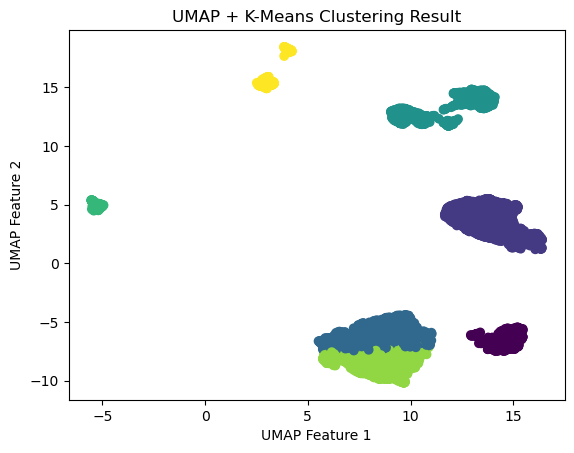

   File  Row   Q1   Q2   Q3  Q4  FQ1  FQ2  FQ3  ComQ1  ...  Dmed_7  Dmed_8  \
0     1    1  5.0  5.0  4.0   5  3.0  1.0    3    1.0  ...    30.0     152   
1     1    2  4.0  4.0  4.0   4  3.0  1.0    3    2.0  ...    29.0     150   
2     1    3  5.0  5.0  4.0   4  3.0  1.0    3    1.0  ...    32.0     160   
3     1    4  5.0  5.0  4.0   4  3.0  4.0    3    1.0  ...    31.0     168   
4     1    5  5.0  5.0  5.0   5  3.0  1.0    3    1.0  ...    34.0     220   

   DMed_1 DMed_2  DMed_3  DMed_9  Dmed_10  Dmed_5  Dmed_6  Cluster  
0     4.0    1.0     4.0     3.0      5.0     1.0     1.0        2  
1     3.0    1.0     8.0     3.0      6.0     1.0     1.0        5  
2     1.0    1.0     4.0     6.0      5.0     1.0     1.0        2  
3     5.0    1.0    12.0     2.0      5.0     1.0     3.0        5  
4     5.0    1.0    12.0     3.0      4.0     7.0    15.0        1  

[5 rows x 124 columns]


In [21]:
import umap
from sklearn.cluster import KMeans

# UMAP降维
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(demographic_data_scaled)

# 选择最佳的簇数
best_k = 7  # 你已经确定7是最佳簇数

# 使用最佳的簇数进行K-Means聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(embedding)
labels = kmeans.labels_

# 计算Silhouette Score
score = silhouette_score(embedding, labels)
print(f"Silhouette Score with {best_k} clusters: {score}")

# 绘制聚类结果
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.title('UMAP + K-Means Clustering Result')
plt.show()

# 将组标签添加到原始数据集中
data['Cluster'] = labels

# 显示数据集的前几行，检查是否正确添加了组标签
print(data.head())


In [22]:
# 分割数据集为7个子数据集
clustered_datasets = {}
for i in range(best_k):
    clustered_datasets[f'Cluster_{i}'] = data[data['Cluster'] == i]

# 显示每个子数据集的前几行，验证分割的正确性
for cluster, dataset in clustered_datasets.items():
    print(f"Dataset for {cluster} (first 5 rows):")
    print(dataset.head())
    print("\n")

Dataset for Cluster_0 (first 5 rows):
    File  Row   Q1   Q2   Q3  Q4  FQ1  FQ2  FQ3  ComQ1  ...  Dmed_7  Dmed_8  \
11     1   12  5.0  2.0  2.0   4  3.0  2.0    3    1.0  ...    30.0     123   
26     1   27  5.0  5.0  4.0   4  1.0  1.0    2    1.0  ...    30.0     120   
29     1   30  4.0  5.0  3.0   4  3.0  3.0    3    1.0  ...    30.0     250   
31     1   32  1.0  5.0  5.0   5  3.0  2.0    3    3.0  ...    33.0     136   
57     1   58  5.0  5.0  4.0   4  2.0  2.0    2    1.0  ...    29.0     144   

    DMed_1 DMed_2  DMed_3  DMed_9  Dmed_10  Dmed_5  Dmed_6  Cluster  
11     3.0    1.0     7.0     7.0      5.0     5.0     2.0        0  
26     2.0    1.0    11.0     1.0      5.0     7.0     1.0        0  
29     4.0    1.0     5.0     1.0      3.0     7.0     1.0        0  
31     7.0    1.0    11.0     8.0      3.0     6.0     7.0        0  
57     6.0    1.0    12.0     1.0      4.0     7.0     9.0        0  

[5 rows x 124 columns]


Dataset for Cluster_1 (first 5 rows):
   

## 2. Pretrain GPT Model

In [9]:
import os

# 创建文件夹
output_dir = 'Data/clusters'
os.makedirs(output_dir, exist_ok=True)




Saved Data/clusters\Cluster_0.txt
Saved Data/clusters\Cluster_1.txt
Saved Data/clusters\Cluster_2.txt
Saved Data/clusters\Cluster_3.txt
Saved Data/clusters\Cluster_4.txt
Saved Data/clusters\Cluster_5.txt
Saved Data/clusters\Cluster_6.txt


### some other models (test later)

#### gpt2 model

In [12]:
import torch
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
else:
    device = torch.device("cpu")
    print("Using CPU")

# Example usage: Move a tensor to the GPU
tensor = torch.tensor([1.0, 2.0, 3.0])
tensor = tensor.to(device)
print(tensor)

Using CPU
tensor([1., 2., 3.])


In [1]:
import torch
from transformers import TrainingArguments, Trainer, GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
import os

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if device.type == "cuda":
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Load pretrained model and tokenizer
model_name = 'gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Move model to device
model.to(device)

# Prepare data
def load_dataset(file_path):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=128
    )

def create_data_collator(tokenizer):
    return DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    fp16=True,  # Enable mixed precision training
    gradient_accumulation_steps=2  # Accumulate gradients
)

# Training function
def train_model(cluster):
    dataset = load_dataset(f'Data/clusters/{cluster}.txt')
    data_collator = create_data_collator(tokenizer)

    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=dataset
    )

    print(f'Training model for {cluster}')
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained(f'./{cluster}_model')
    tokenizer.save_pretrained(f'./{cluster}_model')

# Train models for each cluster
for cluster in clustered_datasets.keys():
    train_model(cluster)


c:\Users\howar\Anaconda3\envs\gpt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


NameError: name 'clustered_datasets' is not defined

#### BERT model

In [20]:
from transformers import BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset

# Load pretrained model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# Function to load dataset
def load_text_dataset(file_path):
    return load_dataset('text', data_files={'train': file_path})['train']

# Function to tokenize dataset
def encode(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128, return_special_tokens_mask=True)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
)

# Pretrain model for each cluster
for cluster in clustered_datasets.keys():
    data_file = os.path.join(output_dir, f"{cluster}.txt")
    dataset = load_text_dataset(data_file)
    tokenized_dataset = dataset.map(encode, batched=True)
    
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=True,
        mlm_probability=0.15
    )
    
    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=tokenized_dataset
    )
    
    print(f'Training model for {cluster}')
    trainer.train()
    
    # Save the pretrained model
    model.save_pretrained(f'./{cluster}_bert_model')
    tokenizer.save_pretrained(f'./{cluster}_bert_model')


KeyboardInterrupt: 

### GPT4

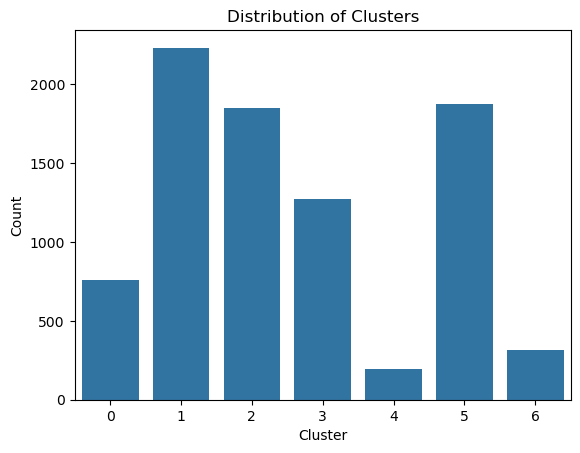

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制条形图
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [25]:
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# 假设 data 是你的Pandas DataFrame
output_dir_train = 'Data/train'
output_dir_test = 'Data/test'

if not os.path.exists(output_dir_train):
    os.makedirs(output_dir_train)

if not os.path.exists(output_dir_test):
    os.makedirs(output_dir_test)

In [26]:
DEFAULT_SYSTEM_PROMPT = "You are a psychologist. Your role is to help understand and discuss the mental and emotional state of the patients based on the information provided. Use the details shared about the patient’s background, symptoms, and behaviors to provide insights into their psychological condition and suggest coping strategies where appropriate."

In [27]:
#condition?
import os
import pandas as pd
import json

# Create directory for clusters
output_dir = 'Data/clusters_jsonl'
os.makedirs(output_dir, exist_ok=True)

def convert_to_prompt(row):
    # Age
    age = f"Age: {18 + int(row['D1']) - 1} years old" if not pd.isna(row['D1']) else "Age: unknown"
    
    # Sex
    sex = "Sex: Male" if row['D2'] == 1 else "Sex: Female" if row['D2'] == 2 else "Sex: unknown"
    
    # Race
    race_options = [
        "White", "Black or African American", "Asian", 
        "Native American or American Indian", "Native Hawaiian or Pacific Islander", 
        "Multiracial or biracial", "Other", "Prefer not to say"
    ]
    race = f"Race: {race_options[int(row['D3']) - 1]}" if not pd.isna(row['D3']) else "Race: unknown"
    
    # Education
    education_options = [
        "8th grade or less", "Attended high school", "High school graduate", 
        "Some college", "College graduate", "Some graduate school", 
        "Graduate/professional degree", "Prefer not to say"
    ]
    education = f"Education: {education_options[int(row['D4']) - 1]}" if not pd.isna(row['D4']) else "Education: unknown"
    
    # Income
    income_options = [
        "Less than $20,000", "$20,000 - $34,999", "$35,000 - $54,999", 
        "$55,000 - $74,999", "$75,000 - $89,999", "$90,000 or more", 
        "Do not know / not sure", "Prefer not to say"
    ]
    income = f"Income: {income_options[int(row['D5']) - 1]}" if not pd.isna(row['D5']) else "Income: unknown"
    
    # Language
    english_first_lang = "Is English your first language: Yes" if row['D6'] == 1 else \
                         "Is English your first language: No" if row['D6'] == 2 else \
                         "Is English your first language: unknown"
    
    # Physical measurements
    height = f"Height: {row['Dmed_7']} feet" if not pd.isna(row['Dmed_7']) else "Height: unknown"
    weight = f"Weight: {row['Dmed_8']} pounds" if not pd.isna(row['Dmed_8']) else "Weight: unknown"
    
    # Health behavior
    prescription_drugs = f"Prescription drugs: {row['DMed_1']}" if not pd.isna(row['DMed_1']) else "Prescription drugs: unknown"
    primary_care_physician = "Primary care physician: Yes" if row['DMed_2'] == 1 else \
                             "Primary care physician: No" if row['DMed_2'] == 2 else \
                             "Primary care physician: unknown"
    visits_to_physician = f"Visits to primary care physician in the past two years: {row['DMed_3']}" if not pd.isna(row['DMed_3']) else "Visits to primary care physician: unknown"
    exercise_hours = f"Exercise hours per week: {row['DMed_9']}" if not pd.isna(row['DMed_9']) else "Exercise hours per week: unknown"
    eating_habits = f"Eating habits self-rating on 1-10 scale: {row['Dmed_10']}" if not pd.isna(row['Dmed_10']) else "Eating habits: unknown"
    smoking_occasions = f"Smoking occasions in the past 30 days: {row['Dmed_5']}" if not pd.isna(row['Dmed_5']) else "Smoking occasions: unknown"
    alcoholic_drinks = f"Alcoholic drinks per week: {row['Dmed_6']}" if not pd.isna(row['Dmed_6']) else "Alcoholic drinks per week: unknown"
    
    # Psychological and additional health traits
    psychological_traits = ""  # Example placeholder
    
    # Combine all into one prompt
    prompt = (
        f"Demographics: {age}, {sex}, {race}, {education}, {income}. "
        f"Behaviors: {english_first_lang}, {height}, {weight}, {exercise_hours}, {smoking_occasions}, {alcoholic_drinks}. "
        f"Healthcare: {prescription_drugs}, {primary_care_physician}, {visits_to_physician}, {eating_habits}. "
        f"Additional Psychological Traits: {psychological_traits}."
    )
    
    return prompt





# 分割数据集为7个子数据集并进行训练/测试分割
clustered_datasets = {}
train_datasets = {}
test_datasets = {}

for i in range(7):  
    cluster_data = data[data['Cluster'] == i]
    train_data, test_data = train_test_split(cluster_data, test_size=0.2, random_state=42)  # 20% 数据作为测试集
    train_datasets[f'Cluster_{i}'] = train_data
    test_datasets[f'Cluster_{i}'] = test_data


def convert_to_jsonl_format(clustered_datasets, output_dir):
    for cluster, dataset in clustered_datasets.items():
        # Fill missing values
        dataset = dataset.fillna({
            'D1': 0, 'D2': 0, 'D3': 0, 'D4': 0, 'D5': 0, 'D6': 0, 'Dmed_7': 0, 'Dmed_8': 0,
            'DMed_1': 0, 'DMed_2': 0, 'DMed_3': 0, 'DMed_9': 0, 'Dmed_10': "unknown", 'Dmed_5': 0, 'Dmed_6': 0,
            'Text_SubjectiveLit': 'unknown', 'Text_TrustPhys': 'unknown', 'Text_Anxiety': 'unknown', 'Text_Numeracy': 'unknown'
        })
        
        jsonl_data = []
        for index, row in dataset.iterrows():
            question = convert_to_prompt(row)
            # Combining the responses into the completion field
            answer = f"Subjective Literacy: {row['Text_SubjectiveLit']} | " \
                         f"Trust in Physician: {row['Text_TrustPhys']} | " \
                         f"Anxiety: {row['Text_Anxiety']} | " \
                         f"Numeracy: {row['Text_Numeracy']}"
            jsonl_data.append({
                "messages": [
                    {"role": "system", "content": DEFAULT_SYSTEM_PROMPT},
                    {"role": "user", "content": question},
                    {"role": "assistant", "content": answer},
                ]
                })
                
        # Saving the jsonl files
        filename = os.path.join(output_dir, f"{cluster}.jsonl")
        with open(filename, 'w') as f:
            for entry in jsonl_data:
                f.write(json.dumps(entry) + "\n")
        print(f"Saved {filename}")


# 转换训练数据和测试数据为JSON格式并保存
convert_to_jsonl_format(train_datasets, output_dir_train)
convert_to_jsonl_format(test_datasets, output_dir_test)


Saved Data/train\Cluster_0.jsonl
Saved Data/train\Cluster_1.jsonl
Saved Data/train\Cluster_2.jsonl
Saved Data/train\Cluster_3.jsonl
Saved Data/train\Cluster_4.jsonl
Saved Data/train\Cluster_5.jsonl
Saved Data/train\Cluster_6.jsonl
Saved Data/test\Cluster_0.jsonl
Saved Data/test\Cluster_1.jsonl
Saved Data/test\Cluster_2.jsonl
Saved Data/test\Cluster_3.jsonl
Saved Data/test\Cluster_4.jsonl
Saved Data/test\Cluster_5.jsonl
Saved Data/test\Cluster_6.jsonl


In [28]:
import json
import tiktoken # for token counting
import numpy as np
from collections import defaultdict

In [29]:
#modify
data_path = "Data/train\Cluster_0.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 608
First example:
{'role': 'system', 'content': 'You are a psychologist. Your role is to help understand and discuss the mental and emotional state of the patients based on the information provided. Use the details shared about the patient’s background, symptoms, and behaviors to provide insights into their psychological condition and suggest coping strategies where appropriate.'}
{'role': 'user', 'content': 'Demographics: Age: 49 years old, Sex: Female, Race: White, Education: Some college, Income: Less than $20,000. Behaviors: Is English your first language: Yes, Height: 27.0 feet, Weight: 150 pounds, Exercise hours per week: 1.0, Smoking occasions in the past 30 days: 7.0, Alcoholic drinks per week: 1.0. Healthcare: Prescription drugs: 5.0, Primary care physician: Yes, Visits to primary care physician in the past two years: 6.0, Eating habits self-rating on 1-10 scale: 3.0. Additional Psychological Traits: .'}
{'role': 'assistant', 'content': 'Subjective Literacy: I d

In [30]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue
        
    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue
        
    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1
        
        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
            format_errors["message_unrecognized_key"] += 1
        
        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1
            
        content = message.get("content", None)
        function_call = message.get("function_call", None)
        
        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1
    
    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found


In [10]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="ft:gpt-3.5-turbo-1106:personal::9YlX38Mw",
  messages=[{"role": "system", "content": "You should simulate a specified person's persona based on the background information I provided. You are currently visiting a psychologist."}, {"role": "user", "content": "In a few sentences, please describe an experience in your life that demonstrated your knowledge of health or medical issues. Below is your information: Demographics: Age: 49 years old, Sex: Female, Race: White, Education: High school graduate, Income: $75,000 - $89,999. Behaviors: Is English your first language: Yes, Height: 29.0 feet, Weight: 190 pounds, Exercise hours per week: 3.0, Smoking occasions in the past 30 days: 3.0, Alcoholic drinks per week: 22.0. Healthcare: Prescription drugs: 4.0, Primary care physician: Yes, Visits to primary care physician in the past two years: 7.0, Eating habits self-rating on 1-10 scale: 7.0. Additional Psychological Traits: ."}],
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [11]:
response

ChatCompletion(id='chatcmpl-9ZkMWiieTTTwLuCXv1RV28uY3QLR1', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='I have a lot of heath situations.  Trying to keep everything straight with the different doctors is very hard.  Sometimes I forget what certain medicines are for which means I do a lot of internet searches about my health and questions to ask.  I have COPD and all the problems comes with smoking.  I do smoke so I know I should stop to help my lungs.  It is very hard though.  I understand the risks to my health.  I understand a little about coding so that helps in trying to understand my doctors.  They do sometimes explain things though most of what I understand when I leave 90 \\% of my doctors apt. is because I asked something on the internet.', role='assistant', function_call=None, tool_calls=None))], created=1718306724, model='ft:gpt-3.5-turbo-1106:personal::9YlX38Mw', object='chat.completion', system_fingerprint=None, usage

In [12]:
# 提取并打印响应文本
text_response = response.choices[0].message.content  # 使用属性访问方式获取文本内容
print(text_response)

I have a lot of heath situations.  Trying to keep everything straight with the different doctors is very hard.  Sometimes I forget what certain medicines are for which means I do a lot of internet searches about my health and questions to ask.  I have COPD and all the problems comes with smoking.  I do smoke so I know I should stop to help my lungs.  It is very hard though.  I understand the risks to my health.  I understand a little about coding so that helps in trying to understand my doctors.  They do sometimes explain things though most of what I understand when I leave 90 \% of my doctors apt. is because I asked something on the internet.
